# Telco Churn Project

### Table of Contents

1. [Dataset Description](#churn)
2. [Importing the packages and dataset](#packages)
3. [Exploring the dataset](#explore)
4. [Null values treatment](#null)
5. [Data Visualizations](#dv)
6. [Label Encoding](#le)
7. [Scaling and Splitting](#ss)
8. [Initial Models](#im)
     - 8.1 [Logistic Regression](#lr)
     - 8.2 [Decision Tree](#dt)
     - 8.3 [Random Forest](#rf)
     - 8.4 [Support Vector Machine](#svm)
     - 8.5 [KNearest Neighbors](#knn)
     - 8.6 [XG Boost Classifier](#xgb)
     - 8.7 [Ada Boost Classifier](#ada)
     - 8.8 [Gradient Boost Classifier](#grad)
     - 8.9 [Comparison Table](#ct)
9. [Stacking](#st)
     - 9.1 [Voting Classifier](#vc)
     - 9.2 [Mlxtend Stacking Classifier](#msc)
     - 9.3 [Comparison Table for Stacking and Mlxtend Voting Classifier](#cst)
     - 9.4 [Vestack](#vec)  

# Telco Churn dataset

### 1. Dataset Description  <a id='churn'>
**Objective**
Our objective is to predict the churn rate of various customers

**Column Descriptions**

1.customerID-Customer ID

2.gender-Whether the customer is a male or a female

3.SeniorCitizen-Whether the customer is a senior citizen or not (1, 0)

4.Partner-Whether the customer has a partner or not (Yes, No)

5.Dependents-Whether the customer has dependents or not (Yes, No)

6.tenure-Number of months the customer has stayed with the company

7.PhoneService-Whether the customer has a phone service or not (Yes, No)

8.MultipleLines-Whether the customer has multiple lines or not (Yes, No, No phone service)

9.InternetService-Customer’s internet service provider (DSL, Fiber optic, No)

10.OnlineSecurity-Whether the customer has online security or not (Yes, No, No internet service)

11.OnlineBackup-Whether the customer has online backup or not (Yes, No, No internet service)

12.DeviceProtection-Whether the customer has device protection or not (Yes, No, No internet service)

13.TechSupport-Whether the customer has tech support or not (Yes, No, No internet service)

14.StreamingTV-Whether the customer has streaming TV or not (Yes, No, No internet service)

15.StreamingMovies-Whether the customer has streaming movies or not (Yes, No, No internet service)

16.Contract-The contract term of the customer (Month-to-month, One year, Two year)

17.PaperlessBilling-Whether the customer has paperless billing or not (Yes, No)

18.PaymentMethod-The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))

19.MonthlyCharges-The amount charged to the customer monthly

20.TotalCharges-The total amount charged to the customer

21.Churn-Whether the customer churned or not (Yes or No)

### 2. Importing the packages and dataset  <a id='packages'>

In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Reading the dataset
churn = pd.read_csv('Telco Churn.csv')

### 3. Exploring the dataset  <a id='explore'>

In [3]:
# Head of the dataset
churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
# Shape of the dataset
churn.shape

(7043, 21)

In [5]:
# Info of the dataset
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [6]:
# Converting the column to numeric
churn.TotalCharges = pd.to_numeric(churn.TotalCharges, errors = 'coerce')

**Descriptive Statistics**

In [7]:
# Summary statistics
churn.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [12]:
# As we could see that the max and min is uneven scaling should be done before model building

### 4. Null values treatment  <a id='null'>

In [8]:
# Checking for null values
churn.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [9]:
# Summary of Total Charges
churn['TotalCharges'].describe()

count    7032.000000
mean     2283.300441
std      2266.771362
min        18.800000
25%       401.450000
50%      1397.475000
75%      3794.737500
max      8684.800000
Name: TotalCharges, dtype: float64

In [10]:
# Treating null values
churn['TotalCharges'] = churn['TotalCharges'].fillna(value=churn['TotalCharges'].median())

### 5. Data Visualizations  <a id='#dv'>

In [13]:
# Column names print
churn.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

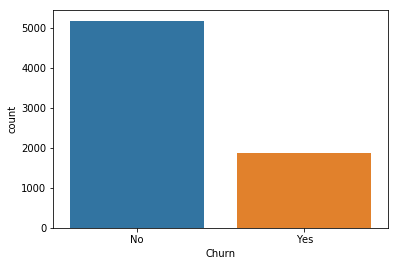

In [14]:
# Count plot for Churn
sns.countplot(x='Churn',data=churn)

**We could see that the count of people churning from the company is less than compared to people present in the business**

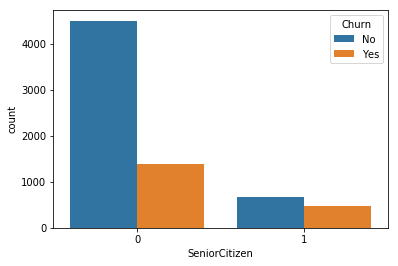

In [15]:
# Countplot for SeniorCitizen and Churn
sns.countplot(x='SeniorCitizen',hue='Churn',data=churn)

**We could see that the count of Senior Citizens in this business are very less and in that about 75% rope out**

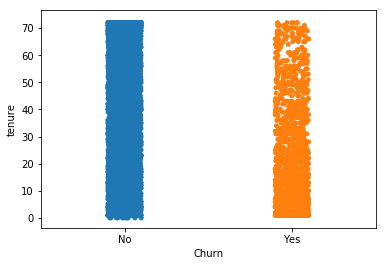

In [16]:
# Stripplot for Churn and tenure
sns.stripplot(x='Churn',y='tenure',data=churn)

**We could see that with increase in tenure the churn rate decreases so the customers with high tenure rate are likely to stay**

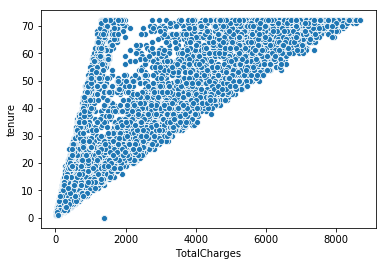

In [17]:
# Scatterplot for Total Charges and tenure
sns.scatterplot(x='TotalCharges',y='tenure',data=churn)

**We could see a positive linear relationship between tenure and TotalCharges so we can say that with increase in TotalCharges the tenure also increases**

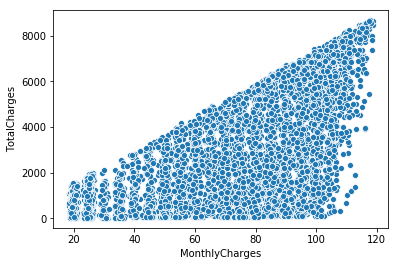

In [18]:
# Scatterplot for Monthly Charges and Total Charges
sns.scatterplot(x='MonthlyCharges',y='TotalCharges',data=churn)

**As we could see that Monthlycharges and TotalCharges are in a positive linear relationship so we could say with increase in MonthlyCharges,TotalCharges also increases.**

**This also proves that with increase in MonthlyCharges,tenure also increases**

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

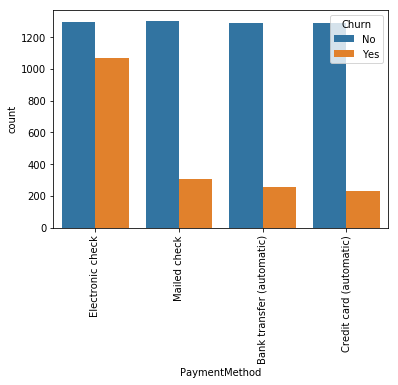

In [19]:
# Countplot for Paymentmethod and Churn
sns.countplot(x='PaymentMethod',hue='Churn',data=churn)
plt.xticks(rotation=90)

**We could see that the payments made through Electronic check made lot of churns compared to other payments it may be due to some issues occured due to Electronic check**

(array([0, 1]), <a list of 2 Text xticklabel objects>)

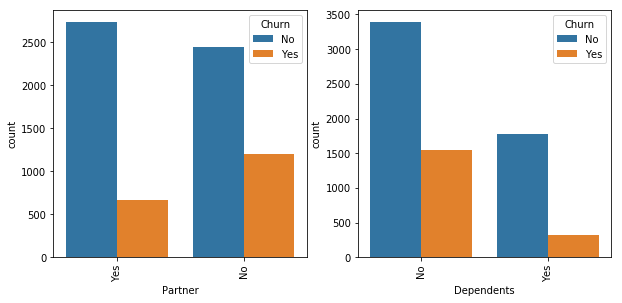

In [21]:
# Plots for Partner Vs Churn and Dependents Vs Churn
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.countplot(x='Partner',hue='Churn',data=churn)
plt.xticks(rotation=90)
plt.subplot(2,2,2)
sns.countplot(x='Dependents',hue='Churn',data=churn)
plt.xticks(rotation=90)

**We could see that the Partners and Dependents are not likely to churn out of the business**

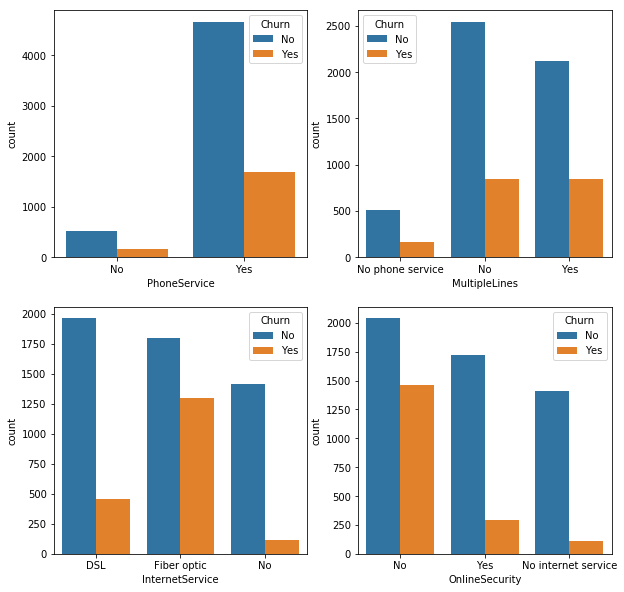

In [23]:
# Plots for:
# 1.Phone Service vs Churn
# 2.Multiple Lines vs Churn
# 3.Internet Service vs Churn
# 4.Online Security vs Churn
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.countplot(x='PhoneService',hue='Churn',data=churn)
plt.subplot(2,2,2)
sns.countplot(x='MultipleLines',hue='Churn',data=churn)
plt.subplot(2,2,3)
sns.countplot(x='InternetService',hue='Churn',data=churn)
plt.subplot(2,2,4)
sns.countplot(x='OnlineSecurity',hue='Churn',data=churn)

**1.We could see that people prefer PhoneService and Multiple Lines is not that much preferable**

**2.We could see that Fiber optic as more churn rate than DSL this may be due to the recent installation of Fiber optic and it might not be stable with the internet connection.**

**3.We could also see that Online security is not a concern for the customers and also some customers are present with only Phone service**

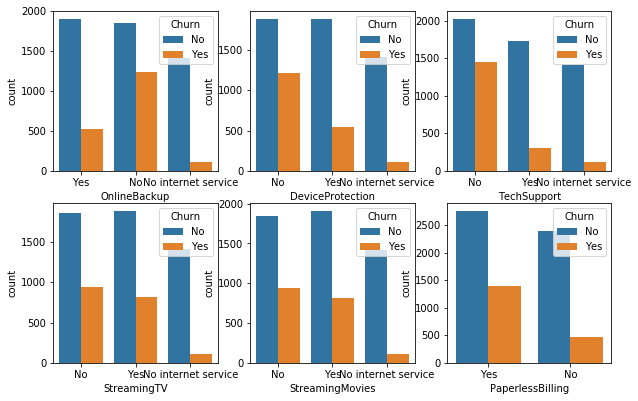

In [24]:
# Plots for:
# 1.Online Backup vs Churn
# 2.Device Protection vs Churn
# 3.Tech Support vs Churn
# 4.Streaming TV vs Churn
# 5.Streaming Movies vs Churn
# 6.Paperless Billing vs Churn
plt.figure(figsize=(10,10))
plt.subplot(3,3,1)
sns.countplot(x='OnlineBackup',hue='Churn',data=churn)
plt.subplot(3,3,2)
sns.countplot(x='DeviceProtection',hue='Churn',data=churn)
plt.subplot(3,3,3)
sns.countplot(x='TechSupport',hue='Churn',data=churn)
plt.subplot(3,3,4)
sns.countplot(x='StreamingTV',hue='Churn',data=churn)
plt.subplot(3,3,5)
sns.countplot(x='StreamingMovies',hue='Churn',data=churn)
plt.subplot(3,3,6)
sns.countplot(x='PaperlessBilling',hue='Churn',data=churn)

**1.We could see that OnlineBackup,DeviceProtection,TechSupport,Streaming Tv and StreamingMovies are not of a concern to customers as they are in need of basic internet and phone connection.**

**2.As we could the churn rate is higher for PaperlessBilling so there are still people who prefer the traditional way of mailing the credit statements to the customers at doorsteps.**

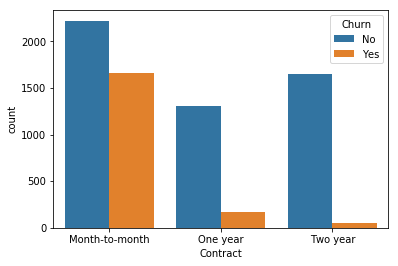

In [25]:
# Countplot for Contract vs Churn
sns.countplot(x='Contract',hue='Churn',data=churn)

**We could see only for Month-to-month the churn rate is higher**

### 6. Label Encoding <a id = 'le'>

In [26]:
# Importing the LabelEncoder library
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [27]:
# Label encoding all the values using Label Encoder
churn['gender'] = le.fit_transform(churn['gender'])
churn['Partner'] = le.fit_transform(churn['Partner'])
churn['Dependents'] = le.fit_transform(churn['Dependents'])
churn['PhoneService'] = le.fit_transform(churn['PhoneService'])
churn['MultipleLines'] = le.fit_transform(churn['MultipleLines'])
churn['InternetService'] = le.fit_transform(churn['InternetService'])
churn['OnlineSecurity'] = le.fit_transform(churn['OnlineSecurity'])
churn['OnlineBackup'] = le.fit_transform(churn['OnlineBackup'])
churn['DeviceProtection'] = le.fit_transform(churn['DeviceProtection'])
churn['TechSupport'] = le.fit_transform(churn['TechSupport'])
churn['StreamingTV'] = le.fit_transform(churn['StreamingTV'])
churn['StreamingMovies'] = le.fit_transform(churn['StreamingMovies'])
churn['Contract'] = le.fit_transform(churn['Contract'])
churn['PaperlessBilling'] = le.fit_transform(churn['PaperlessBilling'])
churn['PaymentMethod'] = le.fit_transform(churn['PaymentMethod'])
churn['Churn'] = le.fit_transform(churn['Churn'])

### 7. Scaling & Splitting <a id = 'ss'>

In [28]:
# Dropping the variable
churn = churn.drop('customerID',1)

In [29]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

In [30]:
# Assigning x and y variables
x = churn.drop('Churn',1)
y = churn['Churn']

In [31]:
# Scaling the x variables
x_scaled = ss.fit_transform(x)

In [32]:
# Converting the scaled data into dataframe
x_scaled = pd.DataFrame(x_scaled,columns=x.columns)

In [33]:
# Importing train test split and splitting the dataset to test and train
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.25,random_state=2)

### 8. Initial Models <a id = 'im'>

### 8.1 Logistic Regression<a id = 'lr'>

In [34]:
# Importing Logistic Regression and performing logistic regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [35]:
# Training and Testing the model
lr.fit(x_train,y_train)
pred = lr.predict(x_test)

C:\Users\sudha\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [36]:
# Importing metrics
from sklearn import metrics

In [39]:
# Precision score for Logistic Regression
lr_precision = metrics.precision_score(pred,y_test)
lr_precision

0.5204545454545455

### 8.2 Decision Tree <a id = 'dt'>

In [40]:
# Importing Decision Tree and performing decision tree
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
dt_pred = dt.predict(x_test)

In [43]:
# Precision score for Decision Tree
dt_precision = metrics.precision_score(dt_pred,y_test)
dt_precision

0.5136363636363637

**Parameter Tuning**

In [44]:
# Importing Randomizedsearchcv and finding out optimal parameters for Decision Tree
from sklearn.model_selection import RandomizedSearchCV
params = {'max_depth': np.arange(1,20),'criterion':['entropy','gini']}
dt = DecisionTreeClassifier()
tree = RandomizedSearchCV(dt, params, cv=3 , return_train_score = True) # RandomizedSearchCV
tree.fit(x_scaled,y)# Fit

RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=DecisionTreeClassifier(class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    presort=False,
                                                    random_state=None,
                                                    splitter='best')

In [45]:
# Optimal parameters for the model
tree.best_params_

{'max_depth': 5, 'criterion': 'entropy'}

In [47]:
# Fitting the model and training and testing after parameter tuning
dtc = DecisionTreeClassifier(criterion='entropy',max_depth=5)
dtc.fit(x_train,y_train)
pred1 = dtc.predict(x_test)

In [50]:
# Precision score for DT after parameter tuning
dt_tune_precision = metrics.precision_score(pred1,y_test)
dt_tune_precision

0.6318181818181818

### 8.3 Random Forest <a id = 'rf'>

In [51]:
# Importing Random Forest Classifier and fitting the model
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
rf_pred = rf.predict(x_test)

C:\Users\sudha\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [54]:
# Precision score for Random Forest
rf_precision = metrics.precision_score(rf_pred,y_test)
rf_precision

0.4318181818181818

**Parameter Tuning**

In [55]:
# Using Randomized SearchCV and finding optimal parameters
rf = RandomForestClassifier()
params1 = {'n_estimators': np.arange(1,20),'criterion':['entropy','gini']}
forest = RandomizedSearchCV(rf, params, cv=3 , return_train_score = True) # GridSearchCV
forest.fit(x_scaled,y)# Fit

C:\Users\sudha\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\sudha\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\sudha\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\sudha\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\sudha\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators='warn',
                                                    n_jobs=None

In [56]:
forest.best_params_

{'max_depth': 9, 'criterion': 'gini'}

In [57]:
# Random Forest after parameter tuning
rfc = RandomForestClassifier(criterion='gini',max_depth=9)
rfc.fit(x_train,y_train)
pred2 = rfc.predict(x_test)

C:\Users\sudha\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [60]:
# Precision score for Random Forest after parameter tuning
rf_tune_precision = metrics.precision_score(pred2,y_test)
rf_tune_precision

0.5113636363636364

### 8.4 Support Vector Machine <a id = 'svm'>

In [61]:
# Importing Support Vector Classifier
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train,y_train)
svc_pred = svc.predict(x_test)

C:\Users\sudha\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [64]:
# Precision score for SVM
svm_precision = metrics.precision_score(svc_pred,y_test)
svm_precision

0.45681818181818185

**Parameter Tuning**

In [65]:
# Using Randomized Search cv to find the optimal parameters
params2 = {'kernel':['linear','rbf'],'C': [0.01, 0.1, 1, 10],'gamma': [0.01,0.1,1,10]}
svc = SVC()
support = RandomizedSearchCV(svc, params2, cv=3 , return_train_score = True) # RandomizedSearchCV
support.fit(x_scaled,y)# Fit

RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=SVC(C=1.0, cache_size=200, class_weight=None,
                                 coef0=0.0, decision_function_shape='ovr',
                                 degree=3, gamma='auto_deprecated',
                                 kernel='rbf', max_iter=-1, probability=False,
                                 random_state=None, shrinking=True, tol=0.001,
                                 verbose=False),
                   iid='warn', n_iter=10, n_jobs=None,
                   param_distributions={'C': [0.01, 0.1, 1, 10],
                                        'gamma': [0.01, 0.1, 1, 10],
                                        'kernel': ['linear', 'rbf']},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=True, scoring=None, verbose=0)

In [66]:
support.best_params_

{'kernel': 'linear', 'gamma': 0.1, 'C': 0.1}

In [67]:
# Fitting the model and training and testing
svc = SVC(C = 0.1,gamma = 0.1,kernel = 'linear')
svc.fit(x_train,y_train)
pred3 = svc.predict(x_test)

In [70]:
# Precision score for SVM after parameter tuning
svm_tune_precision = metrics.precision_score(pred3,y_test)
svm_tune_precision

0.5295454545454545

### 8.5 KNearest Neighbors <a id = 'knn'>

In [71]:
# Importing KNearest Neighbors and fitting the model
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)
knn_pred = knn.predict(x_test)

In [74]:
# Precision score for KNN
knn_precision = metrics.precision_score(knn_pred,y_test)
knn_precision

0.49772727272727274

**Parameter Tuning**

In [75]:
# Finding optimal parameters using Randomized Search CV
leaf_size = list(range(1,50))
n_neighbors = list(range(1,30))
p=[1,2]
params4 = {'leaf_size':np.arange(1,50),'n_neighbors':np.arange(1,30),'p':[1,2]}
knn = KNeighborsClassifier()
neighbor = RandomizedSearchCV(knn, params4, cv=3 , return_train_score = True) # RandomizedSearchCV
neighbor.fit(x_scaled,y)

RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=KNeighborsClassifier(algorithm='auto',
                                                  leaf_size=30,
                                                  metric='minkowski',
                                                  metric_params=None,
                                                  n_jobs=None, n_neighbors=5,
                                                  p=2, weights='uniform'),
                   iid='warn', n_iter=10, n_jobs=None,
                   param_distributions={'leaf_size': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
                                        'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
   

In [76]:
neighbor.best_params_

{'p': 1, 'n_neighbors': 23, 'leaf_size': 3}

In [77]:
# Fitting the model and training and testing
knn = KNeighborsClassifier(n_neighbors=23,p=1,leaf_size=3)
knn.fit(x_train,y_train)
pred4 = knn.predict(x_test)

In [80]:
# Precision score for KNN after parameter tuning
knn_tune_precision = metrics.precision_score(pred4,y_test)
knn_tune_precision

0.575

### 8.6 Ada Boost Classifier <a id = 'ada'>

In [81]:
# Fitting the Ada Boost model
from sklearn.ensemble import AdaBoostClassifier
ab = AdaBoostClassifier()
ab.fit(x_train,y_train)
ab_pred = ab.predict(x_test)

In [84]:
# Precision score for Adaboost
ab_precision = metrics.precision_score(ab_pred,y_test)
ab_precision

0.525

**Parameter Tuning**

In [85]:
# Finding the optimal parameters for Ada Boost Classifier using Randomized Search CV

param_grid1 = {"n_estimators": range(5,20,2) ,  
              "learning_rate": [0.01,0.05,0.1,0.5,1],'algorithm':['SAMME','SAMME.R']}
 

AB = RandomizedSearchCV(ab,param_distributions=param_grid1,
                           cv = 5,
                           n_jobs=-1,
                           scoring='neg_log_loss',
                           verbose=2)
AB.fit(x_scaled,y)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   16.7s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   17.5s finished


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=AdaBoostClassifier(algorithm='SAMME.R',
                                                base_estimator=None,
                                                learning_rate=1.0,
                                                n_estimators=50,
                                                random_state=None),
                   iid='warn', n_iter=10, n_jobs=-1,
                   param_distributions={'algorithm': ['SAMME', 'SAMME.R'],
                                        'learning_rate': [0.01, 0.05, 0.1, 0.5,
                                                          1],
                                        'n_estimators': range(5, 20, 2)},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring='neg_log_loss', verbose=2)

In [86]:
AB.best_params_

{'n_estimators': 13, 'learning_rate': 0.05, 'algorithm': 'SAMME.R'}

In [87]:
# Fitting the model after parameter tuning
abc = AdaBoostClassifier(n_estimators=13,learning_rate=0.05,algorithm='SAMME.R')
abc.fit(x_train,y_train)
abc_pred = abc.predict(x_test)

In [90]:
# Precision score for Ada Boost after parameter tuning
ab_tune_precision = metrics.precision_score(abc_pred,y_test)
ab_tune_precision

0.0

### 8.7 Gradient Boosting <a id = 'grad'>

In [91]:
# Fitting the Gradient Boost model
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
gb.fit(x_train,y_train)
gb_pred = gb.predict(x_test)

In [94]:
# Precision score for Gradient Boosting
gb_precision = metrics.precision_score(gb_pred,y_test)
gb_precision

0.4863636363636364

**Parameter Tuning**

In [96]:
# Finding the optimal parameters For Gradient Boosting Classifier using Randomized Search CV

param_grid1 = {"n_estimators": range(5,20,2) ,  
              "learning_rate": [0.01,0.05,0.1,0.5,1]}
 

GB = RandomizedSearchCV(gb,param_distributions=param_grid1,
                           cv = 5,
                           n_jobs=-1,
                           scoring='neg_log_loss',
                           verbose=2)
GB.fit(x_scaled,y)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    2.3s finished


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=GradientBoostingClassifier(criterion='friedman_mse',
                                                        init=None,
                                                        learning_rate=0.1,
                                                        loss='deviance',
                                                        max_depth=3,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                     

In [97]:
# Optimal parameters
GB.best_params_

{'n_estimators': 15, 'learning_rate': 0.5}

In [98]:
# Fitting the Gradient model after parameter tuning
gbc = GradientBoostingClassifier(n_estimators=15,learning_rate=0.5)
gbc.fit(x_train,y_train)
gbc_pred = gbc.predict(x_test)

In [101]:
# Precision score for Gradient Boosting after parameter tuning
gb_tune_precision = metrics.precision_score(gbc_pred,y_test)
gb_tune_precision

0.49318181818181817

### 8.8 XG Boost <a id = 'xgb'>

In [102]:
from xgboost.sklearn import XGBClassifier

In [103]:
# Fitting the model
xgb_model = XGBClassifier()

In [104]:
# Training the model
xgb_model.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [105]:
# Testing the model
xgboost_pred=xgb_model.predict(x_test)

In [108]:
# Precision score for XG Boost
xgb_precision = metrics.precision_score(xgboost_pred,y_test)
xgb_precision

0.4818181818181818

**Parameter Tuning**

In [111]:
# Finding optimal parameters for XG Boost Classifier using Randomized Search CV
param_grid1 = {"max_depth": [10,15,20,30],
              "n_estimators": range(5,20,2) , 
              "gamma": [0.03,0.05], 
              "learning_rate": [0.01,0.05]}
 

XGB = RandomizedSearchCV(xgb_model,param_distributions=param_grid1,
                           cv = 5,
                           n_jobs=-1,
                           scoring='neg_log_loss',
                           verbose=2)
XGB.fit(x_scaled,y)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
C:\Users\sudha\Anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
C:\Users\sudha\Anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   35.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   39.1s finished


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=1, nthread=None,
                                           objective='binary:logistic',
                                           random_state=0, reg_alpha=0,
                                           reg_lambda=1, scale_pos_weight=1,
                                           seed=None, silent=None, subsample=1,
                                           verbosity=1),
          

In [112]:
XGB.best_params_

{'n_estimators': 19, 'max_depth': 30, 'learning_rate': 0.05, 'gamma': 0.05}

In [113]:
# Fitting the model after parameter tuning
xgbc = XGBClassifier(n_estimators=19,max_depth=30,learning_rate=0.05,gamma=0.05)

In [114]:
# Training the model after parameter tuning
xgbc.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.05,
              learning_rate=0.05, max_delta_step=0, max_depth=30,
              min_child_weight=1, missing=None, n_estimators=19, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [115]:
# Testing the model after parameter tuning
xgbc_pred = xgbc.predict(x_test)

In [118]:
# Precision score for XG Boost
xgb_tune_precision = metrics.precision_score(xgbc_pred,y_test)
xgb_tune_precision

0.5113636363636364

### 8.9 Comparison Table <a id = 'ct'>

In [163]:
# Creating dictionary for all the metrics and models
metrics = {'Metrics': ['Before Parameter Tune Precision Score','After Parameter Tune Precision Score'],'Logistic Regression':[lr_precision,'NA'],
           'Decision Tree Classifier':[dt_precision,dt_tune_precision],'Ramdom Forest Classifier':[rf_precision,rf_tune_precision],'Support Vector Classifier':[svm_precision,svm_tune_precision],
          'KNearestNeighbor Classifier':[knn_precision,knn_tune_precision],
          'XG Boost Classifier':[xgb_precision,xgb_tune_precision],
          'Ada Boost Classifier':[ab_precision,ab_tune_precision],
          'Gradient Boosting Classifier':[gb_precision,gb_tune_precision]}

In [164]:
# Converting to dataframe
metrics = pd.DataFrame(metrics)

In [165]:
# Dataframe
metrics

,Metrics,Logistic Regression,Decision Tree Classifier,Ramdom Forest Classifier,Support Vector Classifier,KNearestNeighbor Classifier,XG Boost Classifier,Ada Boost Classifier,Gradient Boosting Classifier
0,Before Parameter Tune Precision Score,0.520455,0.513636,0.431818,0.456818,0.497727,0.481818,0.525,0.486364
1,After Parameter Tune Precision Score,NA,0.631818,0.511364,0.529545,0.575000,0.511364,0.000,0.493182


**Comparing all the models KNN and SVM are good models**

**Decision Tree also has good score but it has tendency to underfit**

### 9. Stacking <a id = 'st'>

### 9.1 Voting Classifier <a id = 'vc'>

In [129]:
# Assigning estimator models for voting classifier
vote_est = [('rf',rf),('lr',lr),('SVM',svm.SVC())]

In [1]:
# Importing Voting Classifier
from sklearn.ensemble import VotingClassifier
vote = VotingClassifier(estimators=vote_est)

NameError: name 'vote_est' is not defined

In [131]:
# Fitting the model
vote.fit(X_train,y_train)

C:\Users\sudha\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\sudha\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\sudha\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(bootstrap=True,
                                                     class_weight=None,
                                                     criterion='gini',
                                                     max_depth=None,
                                                     max_features='auto',
                                                     max_leaf_nodes=None,
                                                     min_impurity_decrease=0.0,
                                                     min_impurity_split=None,
                                                     min_samples_leaf=1,
                                                     min_samples_split=2,
                                                     min_weight_fraction_leaf=0.0,
                                                     n_estimators='warn',
                                                     n_jobs=None,
       

In [132]:
# Testing the model
vote_pred = vote.predict(x_test)

In [135]:
from sklearn import metrics

In [136]:
# Precision score for Voting Classifier
vote_precision = metrics.precision_score(vote_pred,y_test)
vote_precision

0.4772727272727273

### 9.2 Mlxtend Stacking Classifier <a id = 'msc'>

In [137]:
# mlxtend classifier
from mlxtend.classifier import StackingClassifier

In [141]:
# Assigning individual models to variables
xgb = XGBClassifier()
ada = AdaBoostClassifier()
grad = GradientBoostingClassifier()

In [142]:
# Fitting the model
st = StackingClassifier(classifiers=[dt,rf,svm.SVC(),xgb,ada,grad],meta_classifier=lr)

In [143]:
# Training the model
st.fit(x_train,y_train)

C:\Users\sudha\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\sudha\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\sudha\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


StackingClassifier(average_probas=False,
                   classifiers=[DecisionTreeClassifier(class_weight=None,
                                                       criterion='gini',
                                                       max_depth=None,
                                                       max_features=None,
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                                                       presort=False,
                                                       random_state=None,
                                                 

In [144]:
# Testing the model
st_pred = st.predict(x_test)

In [150]:
# Precision score for Stacking Classifier
st_precision = metrics.precision_score(st_pred,y_test)
st_precision

0.509090909090909

### 9.3 Comparion Table for Stacking <a id = 'cst'>

In [174]:
# Creating dictionary for all the metrics and converting it to dataframe
metrics_stack = {'Models': ['Voting Classifier','Stacking Classifier'],'Precision Score':[vote_precision,st_precision]}

metrics_stack = pd.DataFrame(metrics_stack)

In [175]:
# Dataframe
metrics_stack

,Models,Precision Score
0,Voting Classifier,0.477273
1,Stacking Classifier,0.509091


**We could see Stacking Classifier is the best model**

### 9.4 Vecstack <a id = 'vec'>

In [155]:
!pip install vecstack

  Stored in directory: C:\Users\sudha\AppData\Local\pip\Cache\wheels\5f\bb\4e\f6488433d53bc0684673d6845e5bf11a25240577c8151c140e
Successfully built vecstack


In [157]:
# Importing Vecstack
from vecstack import stacking

In [178]:
#1st level model
models = [lr,rf,dt,svc]
S_train, S_test = stacking(models, x_train, y_train, x_test, 
    regression = False, metric = metrics.precision_score, n_folds = 4 , 
    shuffle = True, random_state = 0, verbose = 2)

task:         [classification]
n_classes:    [2]
metric:       [precision_score]
mode:         [oof_pred_bag]
n_models:     [4]

model  0:     [LogisticRegression]


C:\Users\sudha\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


    fold  0:  [0.59933775]
    fold  1:  [0.66881029]
    fold  2:  [0.69767442]
    fold  3:  [0.63578275]


C:\Users\sudha\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\sudha\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\sudha\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


    ----
    MEAN:     [0.65040130] + [0.03672474]
    FULL:     [0.65036675]

model  1:     [RandomForestClassifier]
    fold  0:  [0.58935361]
    fold  1:  [0.65322581]


C:\Users\sudha\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


    fold  2:  [0.64192140]
    fold  3:  [0.64800000]
    ----
    MEAN:     [0.63312520] + [0.02558622]
    FULL:     [0.63232323]

model  2:     [DecisionTreeClassifier]
    fold  0:  [0.46153846]
    fold  1:  [0.51891892]
    fold  2:  [0.51841360]
    fold  3:  [0.53494624]
    ----
    MEAN:     [0.50845430] + [0.02789092]
    FULL:     [0.50899032]

model  3:     [SVC]
    fold  0:  [0.56996587]
    fold  1:  [0.67892977]
    fold  2:  [0.69932432]
    fold  3:  [0.63486842]
    ----
    MEAN:     [0.64577210] + [0.04958010]
    FULL:     [0.64597315]



**Comparing all the 4 models SVM,Random Forest and Logistic Regression are good models**

In [162]:
#2nd level model
models = [knn,xgb,grad,ada]
S_train, S_test = stacking(models, x_train, y_train, x_test, 
    regression = False, metric = metrics.precision_score, n_folds = 4 , 
    shuffle = True, random_state = 0, verbose = 2)

task:         [classification]
n_classes:    [2]
metric:       [precision_score]
mode:         [oof_pred_bag]
n_models:     [4]

model  0:     [KNeighborsClassifier]
    fold  0:  [0.52835821]
    fold  1:  [0.63798220]
    fold  2:  [0.62247839]
    fold  3:  [0.60281690]
    ----
    MEAN:     [0.59790892] + [0.04204437]
    FULL:     [0.59825328]

model  1:     [XGBClassifier]
    fold  0:  [0.59931507]
    fold  1:  [0.68512111]
    fold  2:  [0.66187050]
    fold  3:  [0.64761905]
    ----
    MEAN:     [0.64848143] + [0.03138395]
    FULL:     [0.64821124]

model  2:     [GradientBoostingClassifier]
    fold  0:  [0.58983051]
    fold  1:  [0.67247387]
    fold  2:  [0.66544118]
    fold  3:  [0.67100977]
    ----
    MEAN:     [0.64968883] + [0.03465868]
    FULL:     [0.64944014]

model  3:     [AdaBoostClassifier]
    fold  0:  [0.60472973]
    fold  1:  [0.67346939]
    fold  2:  [0.66666667]
    fold  3:  [0.66352201]
    ----
    MEAN:     [0.65209695] + [0.02758280]
    FU

**We could see Ada Boost and Gradient Boosting are good models from the 4 models**